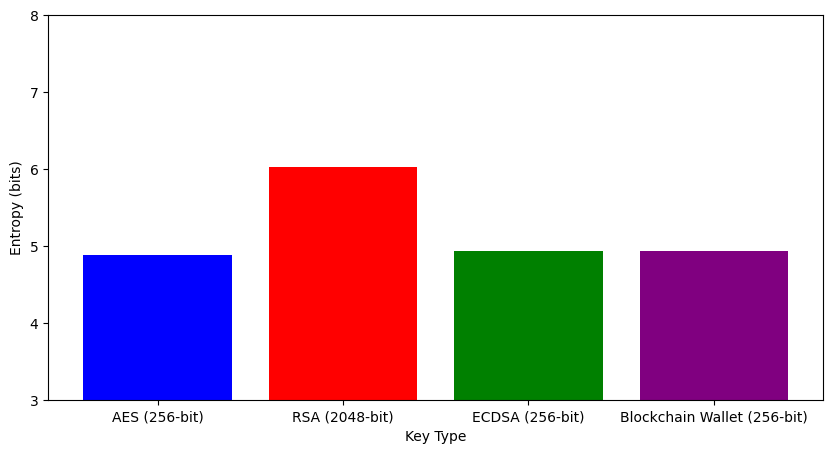

In [1]:
import os
import numpy as np
import secrets
import hashlib
import matplotlib.pyplot as plt
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES
from ecdsa import SigningKey, SECP256k1

def calculate_entropy(data):
    """Calculate Shannon entropy of a given byte sequence"""
    prob = np.bincount(bytearray(data), minlength=256) / len(data)
    prob = prob[prob > 0]
    entropy = -np.sum(prob * np.log2(prob))
    return entropy

def generate_aes_key():
    """Generate a 256-bit AES key"""
    return os.urandom(32)

def generate_rsa_key():
    """Generate a 2048-bit RSA key"""
    key = RSA.generate(2048)
    return key.export_key()

def generate_ecdsa_key():
    """Generate a 256-bit ECDSA key for Bitcoin/Ethereum"""
    sk = SigningKey.generate(curve=SECP256k1)
    return sk.to_string()

def generate_sha256_private_key():
    """Generate a 256-bit private key using SHA-256 (Blockchain wallets)"""
    return hashlib.sha256(secrets.token_bytes(32)).digest()

def main():
    # Generate cryptographic keys
    aes_key = generate_aes_key()
    rsa_key = generate_rsa_key()
    ecdsa_key = generate_ecdsa_key()
    blockchain_key = generate_sha256_private_key()
    
    # Compute entropy for each key type
    entropy_values = {
        "AES (256-bit)": calculate_entropy(aes_key),
        "RSA (2048-bit)": calculate_entropy(rsa_key),
        "ECDSA (256-bit)": calculate_entropy(ecdsa_key),
        "Blockchain Wallet (256-bit)": calculate_entropy(blockchain_key)
    }
    
    # Plot results
    plt.figure(figsize=(10, 5))
    plt.bar(entropy_values.keys(), entropy_values.values(), color=['blue', 'red', 'green', 'purple'])
    plt.xlabel("Key Type")
    plt.ylabel("Entropy (bits)")
    plt.ylim(3, 8)  # Set limits based on entropy range
    plt.savefig("bothnew.eps", format='eps', dpi=300)
    plt.show()

if __name__ == "__main__":
    main()


In [3]:
!pip install ecdsa


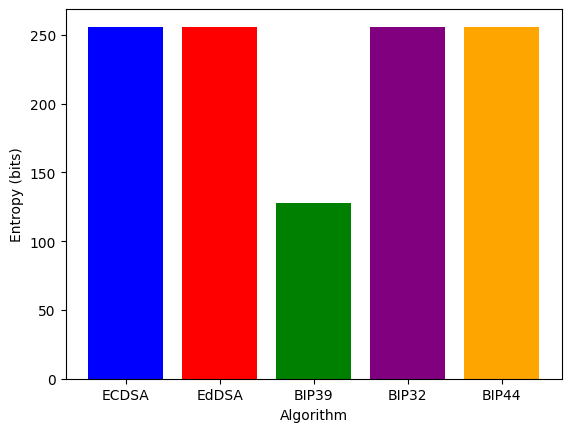

In [3]:
import os
import hashlib
import secrets
import matplotlib.pyplot as plt

# Generate entropy for different key types
def generate_entropy(bits=256):
    return secrets.token_bytes(bits // 8)

# Compute entropy for each algorithm
ecdsa_entropy = generate_entropy(256)
ed25519_entropy = generate_entropy(256)
bip39_entropy = generate_entropy(128)
bip32_entropy = generate_entropy(256)
bip44_entropy = generate_entropy(256)

# Calculate entropy values (in bits)
entropy_values = {
    "ECDSA": len(ecdsa_entropy) * 8,
    "EdDSA": len(ed25519_entropy) * 8,
    "BIP39": len(bip39_entropy) * 8,
    "BIP32": len(bip32_entropy) * 8,
    "BIP44": len(bip44_entropy) * 8,
}

# Plot entropy values
plt.bar(entropy_values.keys(), entropy_values.values(), color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel("Algorithm")
plt.ylabel("Entropy (bits)")
plt.savefig("blockchainnew.eps", format='eps', dpi=300)

plt.show()

In [9]:
pip install ecdsa pynacl matplotlib


Note: you may need to restart the kernel to use updated packages.


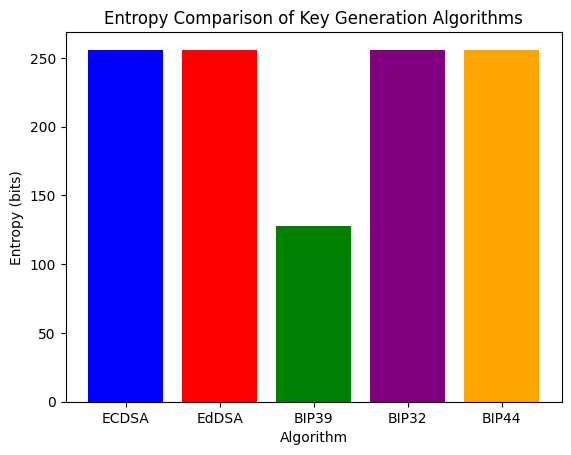

{'ECDSA Key': 'c39b40dad12802dc34840d2c7a1c6e9f305ccfde33e2c7bb1a2324d1c5b867a7', 'EdDSA Key': 'c39b40dad12802dc34840d2c7a1c6e9f305ccfde33e2c7bb1a2324d1c5b867a7', 'BIP39 Key': '2cf5d2acce73d67918bdcc3af7f7cd53', 'BIP32 Key': 'eb2483fa824342c9e88dd4480d065935a71e4b474b5b525c4eecabde466ccfbd', 'BIP44 Key': '47317f8759ac5f1c9f57397182ecab734b98e3813c7134ee39bbebab6d270487', 'Entropy Values': {'ECDSA': 256, 'EdDSA': 256, 'BIP39': 128, 'BIP32': 256, 'BIP44': 256}}


In [11]:
import hashlib
import secrets
from ecdsa import SigningKey, SECP256k1
from nacl.signing import SigningKey as Ed25519SigningKey
import matplotlib.pyplot as plt

# Input text
input_text = "I love cryptography"
hashed_text = hashlib.sha256(input_text.encode()).digest()  # Hash input for deterministic key generation

# ECDSA Key Generation
ecdsa_sk = SigningKey.from_string(hashed_text[:32], curve=SECP256k1)

# EdDSA Key Generation
ed25519_sk = Ed25519SigningKey(hashed_text[:32])

# Simulated BIP39 entropy (128-bit seed phrase generation)
bip39_entropy = secrets.token_bytes(16)  # 128-bit entropy

# Simulated BIP32 key generation (using SHA-512 for deterministic key derivation)
bip32_entropy = hashlib.sha512(hashed_text).digest()[:32]  # Taking first 256 bits

# Simulated BIP44 derived key (using SHA-512 again for simplicity)
bip44_entropy = hashlib.sha512(bip32_entropy).digest()[:32]  # Derive child key

# Compute entropy (in bits)
entropy_values = {
    "ECDSA": len(ecdsa_sk.to_string()) * 8,
    "EdDSA": len(ed25519_sk.encode()) * 8,
    "BIP39": len(bip39_entropy) * 8,
    "BIP32": len(bip32_entropy) * 8,
    "BIP44": len(bip44_entropy) * 8,
}

# Plot entropy values
plt.bar(entropy_values.keys(), entropy_values.values(), color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel("Algorithm")
plt.ylabel("Entropy (bits)")
plt.title("Entropy Comparison of Key Generation Algorithms")
plt.savefig("blockchainplot.png")  # Save as PNG
plt.savefig("blockchainplot.jpg", dpi=300)  # Save as JPG with higher resolution
plt.savefig("blockchainplot.pdf") 
plt.savefig("blockchainplot.eps", format='eps', dpi=300)

plt.show()

# Display results
ecdsa_key = ecdsa_sk.to_string().hex()
ed25519_key = ed25519_sk.encode().hex()
bip39_key = bip39_entropy.hex()
bip32_key = bip32_entropy.hex()
bip44_key = bip44_entropy.hex()

print({
    "ECDSA Key": ecdsa_key,
    "EdDSA Key": ed25519_key,
    "BIP39 Key": bip39_key,
    "BIP32 Key": bip32_key,
    "BIP44 Key": bip44_key,
    "Entropy Values": entropy_values
})


In [23]:
pip install tikzplotlib


Note: you may need to restart the kernel to use updated packages.


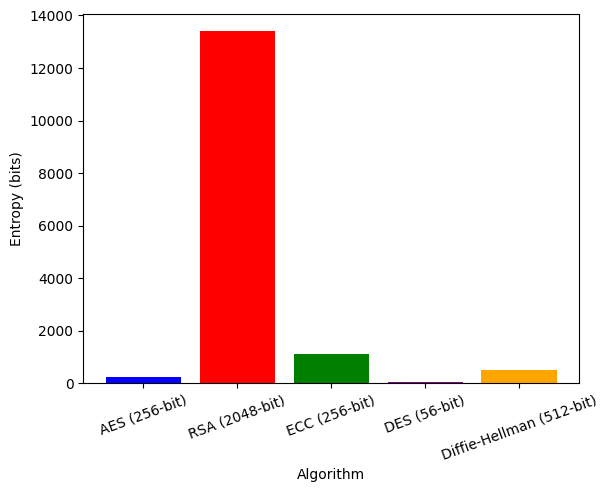

{'AES Key': '9e8f19a1d76e90f798c0eb06f7f50b5fc4e9c903c7789616a944a882c1e3949f',
 'RSA Private Key (truncated)': '2d2d2d2d2d424547494e205253412050524956415445204b45592d2d2d2d2d0a4d4949456f77494241414b43415145416934...',
 'ECC Private Key (truncated)': '308187020100301306072a8648ce3d020106082a8648ce3d030107046d306b0201010420b5242560e7649f89749897841c5f...',
 'DES Key': 'a25ee3e29a1e71',
 'Diffie-Hellman Key': '5b531d38830ca7f174376f514b029c0be6f697fae42c149460da270e0b7af1532990babe8c4202b77b2667a3177c50890618205c5f31b52ffc06947c57796516',
 'Entropy Values': {'AES (256-bit)': 256,
  'RSA (2048-bit)': 13392,
  'ECC (256-bit)': 1104,
  'DES (56-bit)': 56,
  'Diffie-Hellman (512-bit)': 512}}

In [7]:
from Crypto.Cipher import AES
from Crypto.PublicKey import RSA, ECC
import secrets
import hashlib
import matplotlib.pyplot as plt

# Input text
input_text = "I love cryptography"
hashed_text = hashlib.sha256(input_text.encode()).digest()  # Hash input for deterministic key generation

# Symmetric Key Generation (AES - 256-bit)
aes_key = secrets.token_bytes(32)  # 256-bit AES key

# Asymmetric Key Generation (RSA - 2048-bit)
rsa_key = RSA.generate(2048)
rsa_private_key = rsa_key.export_key()
rsa_public_key = rsa_key.publickey().export_key()

# Asymmetric Key Generation (ECC - secp256r1)
ecc_key = ECC.generate(curve='P-256')
ecc_private_key = ecc_key.export_key(format='DER')
ecc_public_key = ecc_key.public_key().export_key(format='DER')

# Simulated DES Key Generation (56-bit)
des_key = secrets.token_bytes(7)  # 56-bit DES key

# Simulated Diffie-Hellman Key (512-bit)
dh_key = secrets.token_bytes(64)  # 512-bit Diffie-Hellman key

# Compute entropy (in bits)
entropy_values = {
    "AES (256-bit)": len(aes_key) * 8,
    "RSA (2048-bit)": len(rsa_private_key) * 8,
    "ECC (256-bit)": len(ecc_private_key) * 8,
    "DES (56-bit)": len(des_key) * 8,
    "Diffie-Hellman (512-bit)": len(dh_key) * 8,
}

# Plot entropy values
plt.bar(entropy_values.keys(), entropy_values.values(), color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel("Algorithm")
plt.ylabel("Entropy (bits)")
plt.xticks(rotation=20)

plt.savefig("entropynew.eps", format='eps', dpi=300)

plt.show()

# Display results
{
    "AES Key": aes_key.hex(),
    "RSA Private Key (truncated)": rsa_private_key[:50].hex() + "...",
    "ECC Private Key (truncated)": ecc_private_key[:50].hex() + "...",
    "DES Key": des_key.hex(),
    "Diffie-Hellman Key": dh_key.hex(),
    "Entropy Values": entropy_values
}


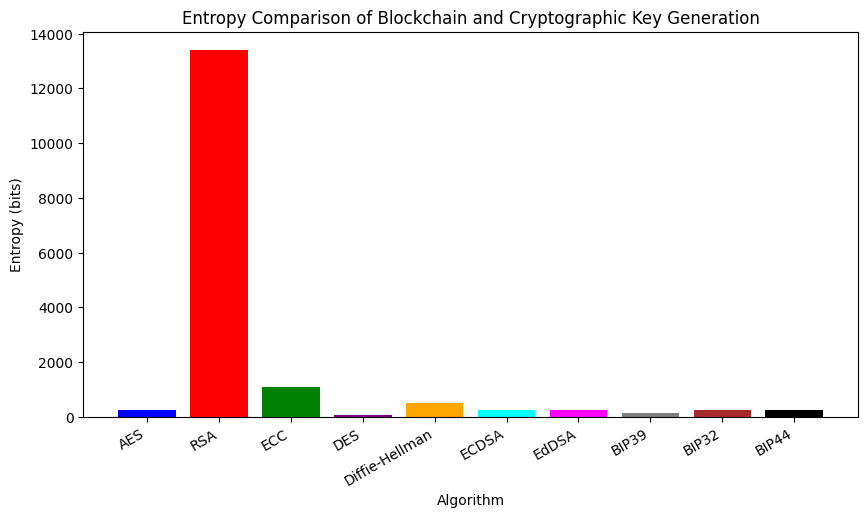

Entropy Values (in bits):
AES: 256 bits
RSA: 13392 bits
ECC: 1104 bits
DES: 56 bits
Diffie-Hellman: 512 bits
ECDSA: 256 bits
EdDSA: 256 bits
BIP39: 128 bits
BIP32: 256 bits
BIP44: 256 bits


In [20]:
import hashlib
import secrets
from ecdsa import SigningKey, SECP256k1
from nacl.signing import SigningKey as Ed25519SigningKey
from Crypto.Cipher import AES
from Crypto.PublicKey import RSA, ECC
import matplotlib.pyplot as plt

# Input text for deterministic hashing
input_text = "I love cryptography"
hashed_text = hashlib.sha256(input_text.encode()).digest()

# Blockchain Key Generation (BIP39, BIP32, BIP44)
bip39_entropy = secrets.token_bytes(16)  # 128-bit entropy (Mnemonic seed)
bip32_entropy = hashlib.sha512(hashed_text).digest()[:32]  # 256-bit HD wallet key
bip44_entropy = hashlib.sha512(bip32_entropy).digest()[:32]  # Derived 256-bit HD key

# Traditional Cryptographic Key Generation
aes_key = secrets.token_bytes(32)  # AES-256 (256-bit entropy)
rsa_key = RSA.generate(2048)  # RSA-2048 (High entropy)
ecc_key = ECC.generate(curve='P-256')  # ECC-256
des_key = secrets.token_bytes(7)  # DES (56-bit entropy)
dh_key = secrets.token_bytes(64)  # Diffie-Hellman 512-bit

# Digital Signature Key Generation (ECDSA, EdDSA)
ecdsa_sk = SigningKey.from_string(hashed_text[:32], curve=SECP256k1)
ed25519_sk = Ed25519SigningKey(hashed_text[:32])

# Compute entropy values (in bits)
entropy_values = {
    "AES": len(aes_key) * 8,
    "RSA": len(rsa_key.export_key()) * 8,
    "ECC": len(ecc_key.export_key(format='DER')) * 8,
    "DES": len(des_key) * 8,
    "Diffie-Hellman": len(dh_key) * 8,
    "ECDSA": len(ecdsa_sk.to_string()) * 8,
    "EdDSA": len(ed25519_sk.encode()) * 8,
    "BIP39": len(bip39_entropy) * 8,
    "BIP32": len(bip32_entropy) * 8,
    "BIP44": len(bip44_entropy) * 8,
}

# Plot entropy values
plt.figure(figsize=(10, 5))
plt.bar(entropy_values.keys(), entropy_values.values(), color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'gray', 'brown', 'black'])
plt.xlabel("Algorithm")
plt.ylabel("Entropy (bits)")
plt.title("Entropy Comparison of Blockchain and Cryptographic Key Generation")
plt.xticks(rotation=30, ha="right")

# Save the plot
plt.savefig("both.png")  # Save as PNG
plt.savefig("both.jpg", dpi=300)  # Save as JPG with higher resolution
plt.savefig("both.pdf") 
plt.savefig("both.eps", format='eps', dpi=300)

plt.show()

# Display entropy values
print("Entropy Values (in bits):")
for key, value in entropy_values.items():
    print(f"{key}: {value} bits")


In [ ]:
#ECDSA 

In [1]:
pip install ecdsa


Note: you may need to restart the kernel to use updated packages.


In [1]:
from ecdsa import SigningKey, VerifyingKey, SECP256k1
import hashlib

# Step 1: Generate Private and Public Keys
private_key = SigningKey.generate(curve=SECP256k1)  # 256-bit private key
public_key = private_key.verifying_key  # Public key derived from private key

print("Private Key (hex):", private_key.to_string().hex())
print("Public Key (hex):", public_key.to_string().hex())

# Step 2: Sign a Message
message = b"Hello, Blockchain!"  # Message to sign
message_hash = hashlib.sha256(message).digest()  # Hash the message

signature = private_key.sign(message_hash)  # Generate ECDSA signature
print("\nSignature (hex):", signature.hex())

# Step 3: Verify the Signature
try:
    is_valid = public_key.verify(signature, message_hash)
    print("\nSignature Valid:", is_valid)  # Should return True if valid
except:
    print("\nSignature Verification Failed!")


Private Key (hex): 702e2c3d62adacb88637016c7623ec8496e66ef6479b25f8e6fee229f77b1471
Public Key (hex): 53e388930170406bd94c4abee067e69ea6342ae25fc5e7e9880b960e720b123923e50804128b2c74653cfadfc8c24dfd8ba0e26c2ca2965ee7fe7474b530653d

Signature (hex): 61beeb02314e5f392a046cd8c33bed002e8cdb3125d044890b50176a31204692df836fed52965a21fab5f50d3de5b80a437dc5cf3e8cf5561e920dfa2a42403d

Signature Valid: True


In [ ]:
#EdDSA 

In [3]:
pip install cryptography


In [1]:
from cryptography.hazmat.primitives.asymmetric import ed25519

# Generate a private key
private_key = ed25519.Ed25519PrivateKey.generate()

# Derive the public key
public_key = private_key.public_key()

print("Private Key:", private_key)
print("Public Key:", public_key)

# Message to be signed
message = b"Hello, blockchain world!"

# Sign the message with the private key
signature = private_key.sign(message)

print("Signature:", signature.hex())  # Convert to hex for readability


try:
    # Verify the signature using the public key
    public_key.verify(signature, message)
    print("Signature is valid!")
except Exception as e:
    print("Signature verification failed:", e)



Private Key: <cryptography.hazmat.bindings._rust.openssl.ed25519.Ed25519PrivateKey object at 0x00000177342972B0>
Public Key: <cryptography.hazmat.bindings._rust.openssl.ed25519.Ed25519PublicKey object at 0x000001773475A450>
Signature: ceab87063c07552d5795509e0207a745720a379d6fa9288c88fa3619e7bf74ab31cc288a27de88dd24e5275efd3fee5aaed1cf5a6d2adf3d386daaec2fa5c909
Signature is valid!


In [ ]:
# BIP39 Mnemonic Phrase

In [3]:
pip install mnemonic bip-utils eth_account


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/872.5 kB ? eta -:--:--
     ---------------------- --------------- 524.3/872.5 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 872.5/872.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/589.4 kB ? eta -:--:--
   ---------------------------------------- 589.4/589.4 kB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/587.0 kB ? eta -:--:--
   --------------------------------------- 587.0/587.0 kB 10.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 7.6 MB/s eta 0:00:00
  Created wheel for crcmod: filename=crcmod-1.7-cp312-cp312-win_amd64.whl size=25109 sha256=57704b49f572473bc5b7e450

In [ ]:
#Step 1: Generate a BIP39 Mnemonic Phrase


In [7]:
from mnemonic import Mnemonic

# Generate a 12-word mnemonic phrase
mnemo = Mnemonic("english")
mnemonic_phrase = mnemo.generate(strength=128)  # 128-bit entropy → 12 words
print("Mnemonic Phrase:", mnemonic_phrase)


Mnemonic Phrase: pull protect edit spoil small resist omit lens toddler girl exile digital


In [ ]:
#Step 2: Convert Mnemonic to Seed

In [9]:
from bip_utils import Bip39SeedGenerator

# Convert mnemonic phrase into a 512-bit seed
seed = Bip39SeedGenerator(mnemonic_phrase).Generate()
print("Seed (hex):", seed.hex())


Seed (hex): c5c5ff62fc359bb370b531637c98e556d88507b0ee80213e9db5d91ca83a705358543c4683479704699f1ab23a7f74637feb77709e679ba4312199c5d249bc08


In [ ]:
#Step 3: Derive BIP32 Master Key and Ethereum Private Key

In [11]:
from bip_utils import Bip44, Bip44Coins

# Derive Ethereum private key (BIP44 path: m/44'/60'/0'/0/0)
bip44 = Bip44.FromSeed(seed, Bip44Coins.ETHEREUM)
eth_private_key = bip44.PrivateKey().Raw().ToHex()
eth_public_key = bip44.PublicKey().RawCompressed().ToHex()
eth_address = bip44.PublicKey().ToAddress()

print("Ethereum Private Key:", eth_private_key)
print("Ethereum Public Key:", eth_public_key)
print("Ethereum Address:", eth_address)


Ethereum Private Key: 174077baf9e37f0904f17a551c0c652576d67d9a25da0fa282e5f2cd16a19cdc
Ethereum Public Key: 033c17d62cab0ddf99fae41acf6809862932c1cb3d386941c2714852c466f669cb
Ethereum Address: 0xfcf0B40A5CC2B7EE4887B106b31ac16a29fF6B1e


In [ ]:
#Step 4: Sign a Message Using the Private Key

In [17]:
from eth_account import Account
from eth_account.messages import encode_defunct

# Create a message
message = "Hello, Blockchain!"

# Encode the message in Ethereum's format
encoded_message = encode_defunct(text=message)

# Sign the message using the private key
signed_message = Account.sign_message(encoded_message, private_key=eth_private_key)

print("Signed Message (Hex):", signed_message.signature.hex())


Signed Message (Hex): 5ab61c3af215ef0c4314554a27660433c6b3543019ae28a555e745f6b19c3efd76cb44b6f2b40e02b610eacf3ea56db7a655741b5bedbfea1c180084ebeb07751b


In [ ]:
#Step 5: Verify the Signature

In [19]:
from eth_account.messages import encode_defunct

# Encode the message in Ethereum's format
encoded_message = encode_defunct(text=message)

# Recover the signing address from the signature
recovered_address = Account.recover_message(encoded_message, signature=signed_message.signature)

print("Recovered Address:", recovered_address)
print("Signature is valid:", recovered_address.lower() == eth_address.lower())


Recovered Address: 0xfcf0B40A5CC2B7EE4887B106b31ac16a29fF6B1e
Signature is valid: True
